<a href="https://colab.research.google.com/github/AmeliaGizzela/TugasBKSD06/blob/main/BKSD_Amelia_Gizzela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Contents**

1. Pengumpulan Data
2. Menelaah Data
3. Validasi Data
4. Menetukan Object Data
5. Membersihkan Data
6. Konstruksi Data
7. Modelling
8. Evaluasi
9. Streamlit
10. Kesimpulan

# **1) Pengumpulan Data**

Dataset yang digunakan adalah dataset yang bersumber dari link berikut : https://archive.ics.uci.edu/dataset/45/heart+disease
Dataset yang dipakai adalah dataset dengan nama file "Hungarian.data" diharapkan sebelum memakai dataset tersebut anda dapat membaca deskripsi dataset yang ada di dalam file "heart-disease.names"

# **2) Menelaah Data**


In [ ]:
#Import Libraries
import pandas as pd
import re
import numpy as np
import itertools

In [ ]:
#Load data
with open('/content/drive/MyDrive/1BK_Udinus/hungarian.data', encoding='Latin1') as file:
    lines = [line.strip() for line in file]
    lines[0:10]

setelah membaca file dataset lakukan iterasi sesuai jumlah kolom dan baris yang ada pada dataset. Untuk keterangan kolom dan baris dapat dilihat melalui deskripsi dataset yang sudah dijelaskan sebelumnya

In [ ]:
data = itertools.takewhile(
    lambda x: len(x)== 76,
    (' '.join(lines[i:(i+10)]).split() for i in range(0,len(lines),10))
)

In [ ]:
df = pd.DataFrame.from_dict(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


menampilan informasi dari file dataset yang sudah dimasukkan kedalam dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

Pada kondisi dataset yang kita miliki terdapat kondisi khusus yang dimana sebelum memasuki tahap validasi data untuk tipe data object atau string perlu dilakukan penghapusan fitur dikarenakan pada dataset ini nilai null disimbolkan dengan angka -9.0

In [ ]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0],axis=1)

mengubah tipe data file dataset menjadi tipe data float sesuai dengan nilai null yaitu -9.0

In [ ]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

# **3) Validasi Data**

Pada tahap ini bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya

mengubah nilai -9.0 menjadi nilai null value sesuai dengan deskripsi dataset


In [ ]:
df.replace(-9.8, np.nan, inplace=True)

menghitung jumlah nilai null value



In [ ]:
df.isnull().sum()

1     0
2     0
3     0
4     0
5     0
     ..
70    0
71    0
72    0
73    0
74    0
Length: 74, dtype: int64

In [ ]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,-9.0,2.0,140.0,0.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
1,0.0,49.0,0.0,1.0,0.0,0.0,-9.0,3.0,160.0,1.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
2,0.0,37.0,1.0,1.0,0.0,0.0,-9.0,2.0,130.0,0.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
3,0.0,48.0,0.0,1.0,1.0,1.0,-9.0,4.0,138.0,0.0,...,-9.0,2.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
4,0.0,54.0,1.0,1.0,0.0,1.0,-9.0,3.0,150.0,0.0,...,-9.0,1.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

# **4) Menentukan Object Data**

Memilih 14 fitur yang akan digunakan sesuai dengan deskripsi dataset

In [ ]:
df_selected = df.iloc[:, [1, 2, 7,8,10,14,17,30,36,38,39,42,49,56]]

df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       294 non-null    float64
 4   11      294 non-null    float64
 5   15      294 non-null    float64
 6   18      294 non-null    float64
 7   31      294 non-null    float64
 8   37      294 non-null    float64
 9   39      294 non-null    float64
 10  40      294 non-null    float64
 11  43      294 non-null    float64
 12  50      294 non-null    float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


mengganti nama kolom sesuai dengan 14 nama kolom yang ada pada deskripsi dataset

In [ ]:
column_mapping ={
  2: 'age',
  3: 'sex',
  8: 'cp',
  9: 'trestbps',
  11: 'chol',
  15: 'fbs',
  18: 'restecg',
  31: 'thalach',
  37: 'exang',
  39: 'oldpeak',
  40: 'slope',
  43: 'ca',
  50: 'thal',
  57: 'target'
}

df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-339-6efcb96fab4d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    float64
 11  ca        294 non-null    float64
 12  thal      294 non-null    float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


mengganti nama kolom sesuai dengan 14 nama kolom yang ada pada deskripsi dataset

In [ ]:
df_selected.value_counts()

age   sex  cp   trestbps  chol    fbs   restecg  thalach  exang  oldpeak  slope  ca    thal  target
49.0  0.0  2.0  110.0     -9.0     0.0  0.0      160.0    0.0    0.0      -9.0   -9.0  -9.0  0.0       2
52.0  0.0  4.0  130.0      180.0   0.0  0.0      140.0    1.0    1.5       2.0   -9.0  -9.0  0.0       1
53.0  0.0  3.0  120.0      274.0   0.0  0.0      130.0    0.0    0.0      -9.0   -9.0  -9.0  0.0       1
           2.0  140.0      216.0   0.0  0.0      142.0    1.0    2.0       2.0   -9.0  -9.0  0.0       1
                113.0      468.0  -9.0  0.0      127.0    0.0    0.0      -9.0   -9.0  -9.0  0.0       1
                                                                                                      ..
45.0  0.0  2.0  180.0     -9.0     0.0  0.0      180.0    0.0    0.0      -9.0   -9.0  -9.0  0.0       1
                130.0      237.0   0.0  0.0      170.0    0.0    0.0      -9.0   -9.0  -9.0  0.0       1
44.0  1.0  4.0  150.0      412.0   0.0  0.0      170.0    0.

# **5) Membersihkan Data**

Sebelum melakukan pemodelan dilakukan pembersihan data agar model yang dihasilkan lebih akurat

menghitung jumlah null values yang ada di dalam dataset

In [ ]:
df_selected.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Berdasarkan output kode program diatas ada beberapa fitur yang hampir 90% datanya memiliki nilai null sehingga perlu dilakukan penghapusan fitur menggunakan fungsi drop


In [ ]:
columns_to_drop = ['ca', 'slope', 'thal']

df_selected = df_selected.drop(columns_to_drop, axis=1)

df_selected.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [ ]:
meanTBPS = df_selected[ 'trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna ()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna ()

meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)

meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

In [ ]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

In [ ]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [ ]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

melalukan pengecekan terhadap duplikaksi data

In [ ]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,-9.0,0.0,0.0,160.0,0.0,0.0,0.0


In [ ]:
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,-9.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,-9.0,0.0,0.0,160.0,0.0,0.0,0.0


Menghapus data yang memiliki duplikat

In [ ]:
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [ ]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,0.0


In [ ]:
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

**Mencari korelasi antar fitur**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.222512,0.045611,0.045098,-0.006940,-0.432754,0.153728,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.115021,0.018915,0.090950,-0.097261,-0.067506,0.170677,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.099132,0.109281,0.003048,0.078865,-0.324638,0.364140,0.351735,0.427536
trestbps,0.222512,0.115021,0.099132,1.000000,0.007509,0.062697,-0.038492,-0.007598,0.448866,0.145708,0.210500
chol,0.045611,0.018915,0.109281,0.007509,1.000000,-0.110997,0.029512,-0.085352,0.072059,0.129757,0.217982
fbs,0.045098,0.090950,0.003048,0.062697,-0.110997,1.000000,-0.007203,-0.001567,0.019839,0.049079,0.098238
restecg,-0.006940,-0.097261,0.078865,-0.038492,0.029512,-0.007203,1.000000,-0.014135,-0.013683,0.055553,-0.049704
thalach,-0.432754,-0.067506,-0.324638,-0.007598,-0.085352,-0.001567,-0.014135,1.000000,0.019880,-0.313400,-0.332034
exang,0.153728,0.170677,0.364140,0.448866,0.072059,0.019839,-0.013683,0.019880,1.000000,0.337006,0.397524
oldpeak,0.178172,0.115959,0.351735,0.145708,0.129757,0.049079,0.055553,-0.313400,0.337006,1.000000,0.580732


<Axes: >

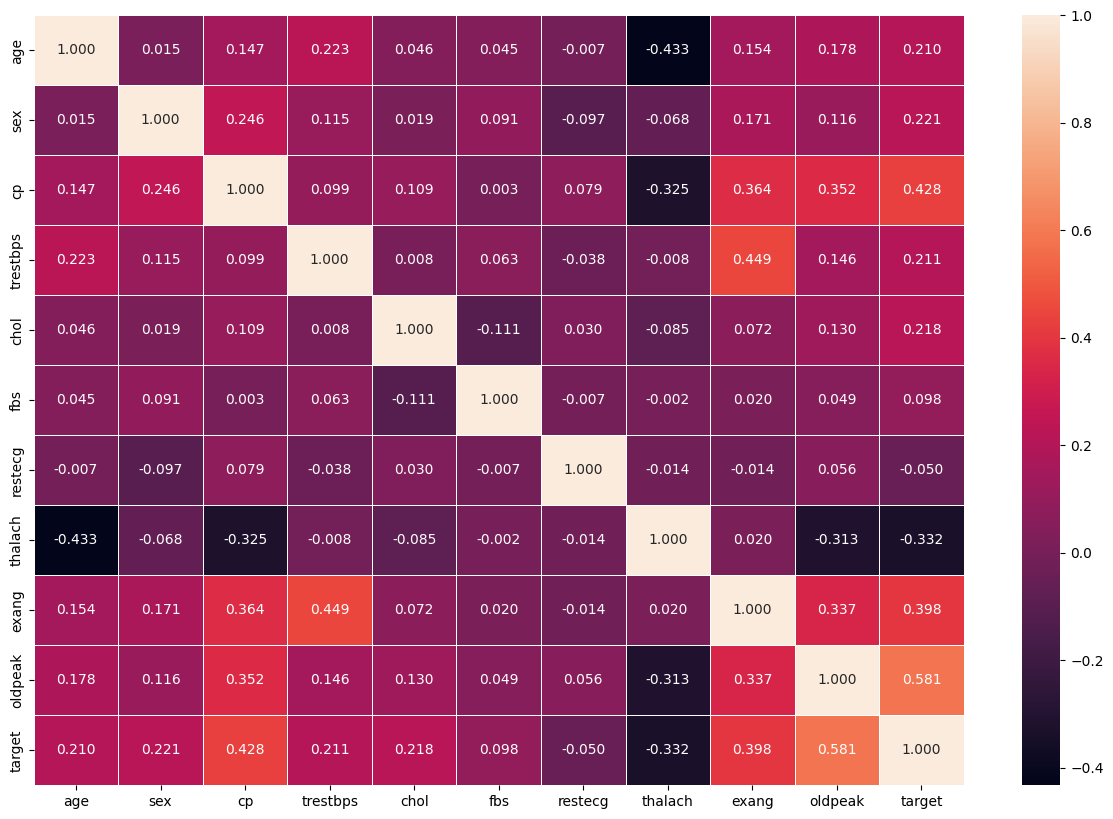

In [ ]:
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")


# **6) Konstruksi Data**

Dalam tahap ini Konstruksi data salah satu tujuannya yaitu untuk menyesuaikan semua tipe data yang ada di dalam dataset. Namun pada tahap ini dataset sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali

In [ ]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [ ]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,0.0


Setelah Menyesuaikan tipe dataset kita , kita harus memisahkan antara fitur dan target lalu simpan kedalam variabel.

In [ ]:
X = dfClean.drop("target",axis=1).values
y = dfClean.iloc[:,-1]

Setelah kita memisahkan antara fitur dan target , sebaiknya kita melakukan pengecekan terlebih dahulu terhadap persebaran jumlah target terlebih dahulu.

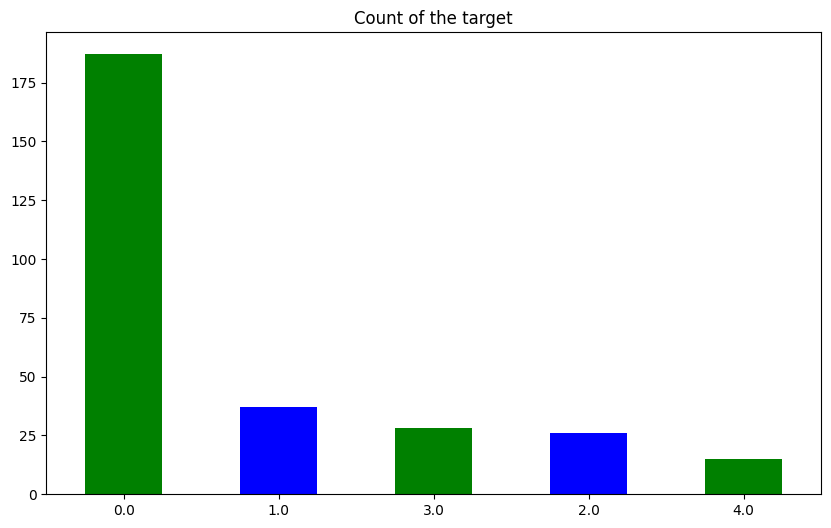

In [ ]:
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);


Pada Grafik diatas menunjukan bahwa persebaran jumlah target tidak seimbang oleh karena itu perlu diseimbangkan terlebih dahulu.
Menyeimbangkan target ada 2 cara yaitu oversampling dan undersampling.  

*   oversampling dilakukan jika jumlah dataset sedikit
*   undersampling dilakukan jika jumlah data terlalu banyak.

Disini kita akan melakukan oversampling dikarenakan jumlah data kita tidak banyak. Salah satu metode yang Oversampling yang akan kita gunakan adalah SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)


In [ ]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [ ]:
new_df1 = pd.DataFrame(data=y)

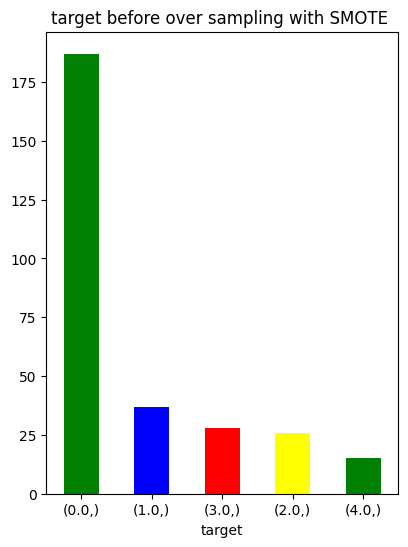

In [ ]:
plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);


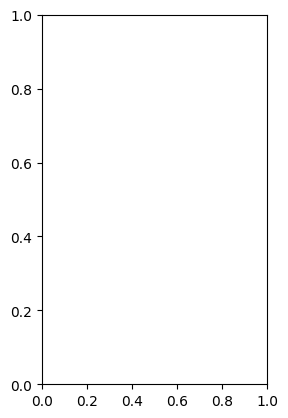

In [ ]:
plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)


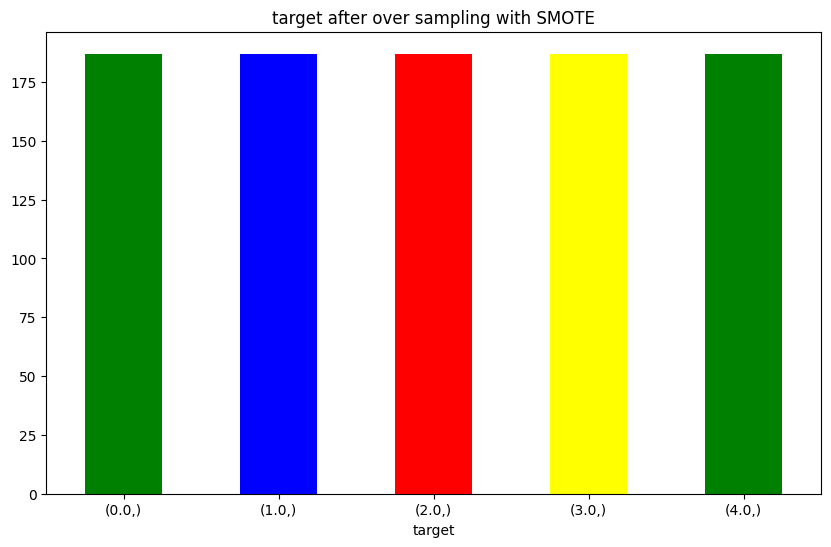

In [ ]:
new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);


In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Pada Grafik diatas dapat dilihat ketika target belum di seimbangkan dan sudah diseimbangkan menggunakan oversampling.



In [ ]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [ ]:
# over
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

Setelah menyeimbangkan persebaran jumlah target kita akan melakukan mengecekan apakah perlu dilakukan normalisasi/standarisasi pada datset kita.

In [ ]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.177474,231.337884,-0.177474,0.187713,138.552901,0.273038,0.588055,0.795222
std,7.824875,0.446282,0.965049,19.427665,94.540626,1.502021,0.708741,25.095737,0.712311,0.909554,1.238251
min,28.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,198.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,237.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Pada deskripsi diatas dapat dilihat bahwa terdapat rentang nilai yang cukup jauh pada standar deviasi setiap fitur dataset yang kita miliki. Oleh karena itu perlu dilakukan normalisasi/standarisasi agar memperkecil rentang antara standar deviasi setiap kolom.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)


In [ ]:
len(X_smote_resampled_normal)

935

In [ ]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.558018,0.841920,0.816576,0.691692,0.419238,0.895555,0.830114,0.703343,0.958351,0.233740
std,0.168985,0.333318,0.274064,0.080564,0.133154,0.104922,0.083067,0.110111,0.054813,0.203692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.469351,1.000000,0.666667,0.636836,0.364482,0.900000,0.818182,0.625339,0.900000,0.000000
50%,0.575549,1.000000,1.000000,0.682048,0.431324,0.900000,0.818182,0.698492,0.992465,0.205888
75%,0.675235,1.000000,1.000000,0.736842,0.486928,0.900000,0.854063,0.782818,1.000000,0.392187
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Setelah dilakukan normalisasi pada fitur, selanjutnya kita perlu membagi fitur dan target menjadi data train dan test.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)

In [ ]:
# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

# **7) Model**

Pada tahap ini kita akan memulai untuk membangun sebuah model.

Dibawah ini merupakan sebuah fungsi untuk menampilkan hasil akurasi dan rata - rata dari recall , f1 dan precision score setiap model. Fungsi ini nantinya akan dipanggil di setiap model. Membuat Fungsi ini bersifat opsional.

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

In [ ]:
def evaluation(Y_test,Y_pred):
  acc = accuracy_score(Y_test,Y_pred)
  rcl = recall_score(Y_test,Y_pred,average = 'weighted')
  f1 = f1_score(Y_test,Y_pred,average = 'weighted')
  ps = precision_score(Y_test,Y_pred,average = 'weighted')

  metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
                'F1 score': round(f1,3),
                'Precision score': round(ps,3)
              }

  return print(metric_dict)


# Oversample

# KNN
Pada tahap ini kita akan akan memulai membangun model dengan algoritma KNN dengan nilai neighbors yaitu 3.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Berikut adalah kode program untuk menampilkan hasil akurasi dengan algoritma KNN.

In [ ]:
y_pred_knn = knn_model.predict(X_test)

In [ ]:
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.727
Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.32      0.41        38
         1.0       0.70      0.81      0.75        37
         2.0       0.73      0.81      0.77        37
         3.0       0.74      0.84      0.79        38
         4.0       0.80      0.86      0.83        37

    accuracy                           0.73       187
   macro avg       0.71      0.73      0.71       187
weighted avg       0.71      0.73      0.71       187



In [ ]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.727, 'recall': 0.727, 'F1 score': 0.71, 'Precision score': 0.714}


Pada visualisasi ini ditampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya.

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)

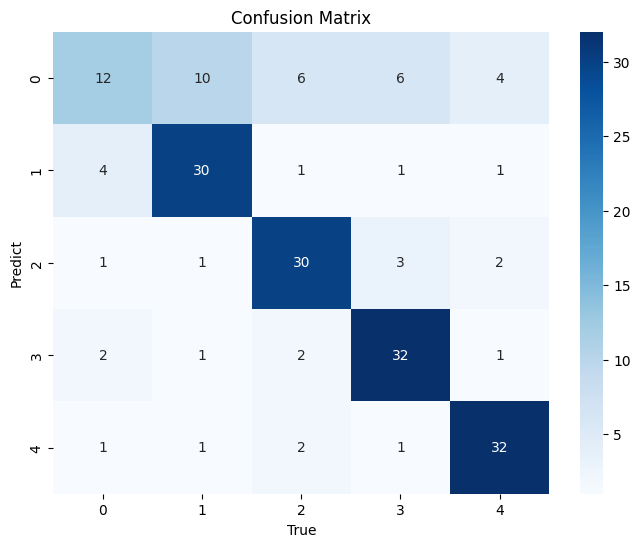

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# **Random Forest**
Selanjutnya kita akan membangun model dengan algoritma random forest dengan n_estimators yaitu 100, n_estimators sendiri berguna
mengatur jumlah pohon keputusan yang akan dibangun.

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate the Random Forest model print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.94      0.89      0.92        37
         2.0       0.80      0.95      0.86        37
         3.0       0.95      0.92      0.93        38
         4.0       0.97      0.89      0.93        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.92       187
weighted avg       0.92      0.91      0.92       187



In [ ]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.914, 'recall': 0.914, 'F1 score': 0.916, 'Precision score': 0.92}


In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

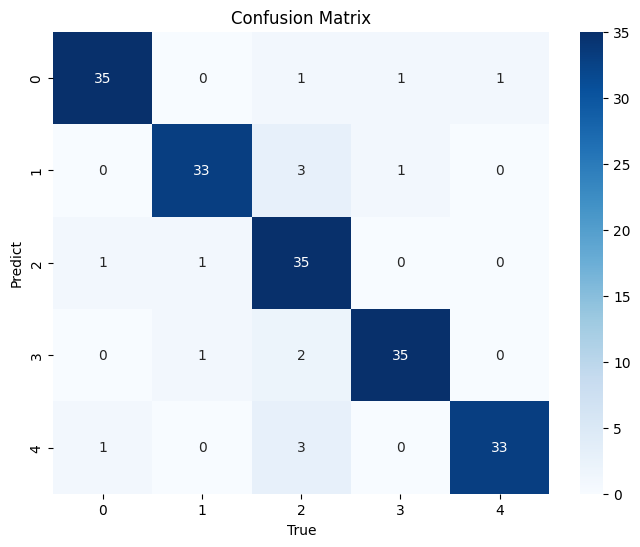

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


# **XGBoost**

Pada tahap ini dalam membangun model, kita akan menggunakan algoritma XGBoost dengan learning rate yaitu 0.1. learning rate berguna untuk mengontrol seberapa besar kita menyesuaikan bobot model.



In [ ]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Evaluate the XGBoost model print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Accuracy: 0.909
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        38
         1.0       0.94      0.86      0.90        37
         2.0       0.85      0.92      0.88        37
         3.0       0.90      0.95      0.92        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187



In [ ]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.909, 'recall': 0.909, 'F1 score': 0.909, 'Precision score': 0.911}


In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)

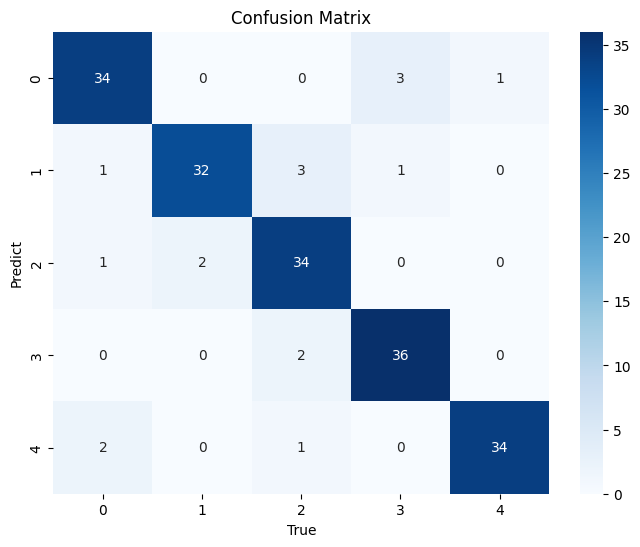

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


# **Oversample + Normalisasi**
Pada bagian ini kita akan membuat sebuah model yang dimana data yang dipakai kali ini yang sudah dilakukan oversample dan normalisasi. Algoritma yang digunakan sama seperti sebelumnya yaitu KNN, Random Forest, dan XGBoost. Sekaligus dibuat visualisasi hasil evaluasi pada masing-masing model.

# **KNN**

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn_model.predict(X_test_normal)

In [ ]:
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))



K-Nearest Neighbors (KNN) Model:
Accuracy: 0.829
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.71      0.78        38
         1.0       0.85      0.78      0.82        37
         2.0       0.80      0.97      0.88        37
         3.0       0.82      0.82      0.82        38
         4.0       0.82      0.86      0.84        37

    accuracy                           0.83       187
   macro avg       0.83      0.83      0.83       187
weighted avg       0.83      0.83      0.83       187



In [ ]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.829, 'recall': 0.829, 'F1 score': 0.827, 'Precision score': 0.832}


Pada visualisasi ini ditampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya.

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)

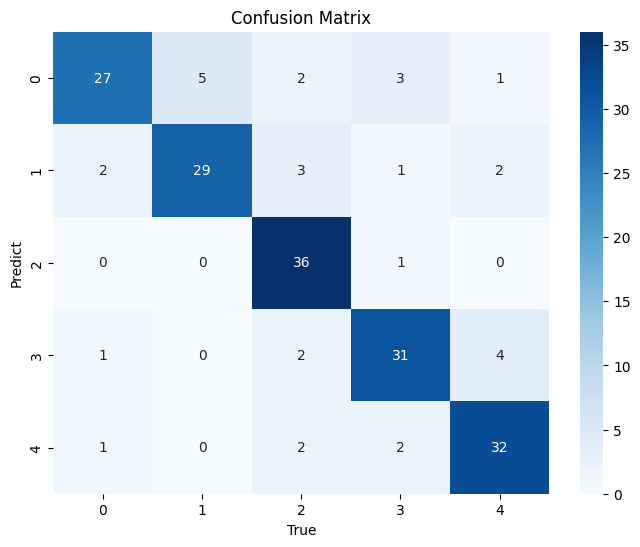

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# **Random Forest**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_normal)

In [ ]:
# Evaluate the Random Forest model print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.97      0.89      0.93        37
         2.0       0.80      0.97      0.88        37
         3.0       0.95      0.92      0.93        38
         4.0       0.97      0.89      0.93        37

    accuracy                           0.92       187
   macro avg       0.93      0.92      0.92       187
weighted avg       0.93      0.92      0.92       187



In [ ]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.921, 'Precision score': 0.927}


In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

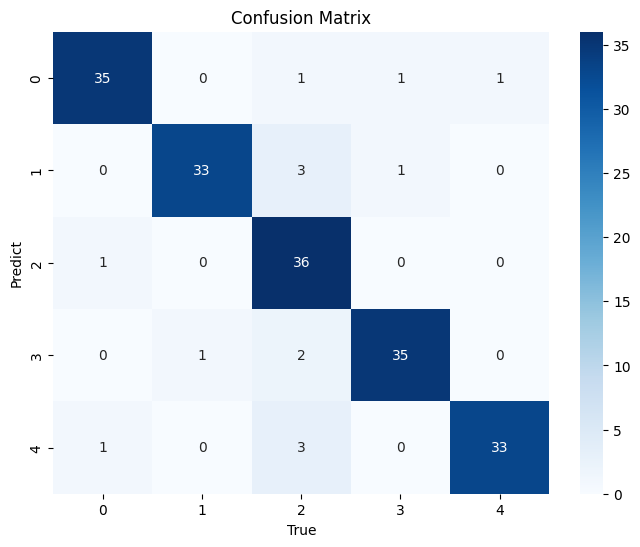

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# **XGBOOST**

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_normal)

In [ ]:
# Evaluate the XGBoost model print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


Accuracy: 0.909
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        38
         1.0       0.94      0.86      0.90        37
         2.0       0.85      0.92      0.88        37
         3.0       0.90      0.95      0.92        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187



In [ ]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.909, 'recall': 0.909, 'F1 score': 0.909, 'Precision score': 0.911}


In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

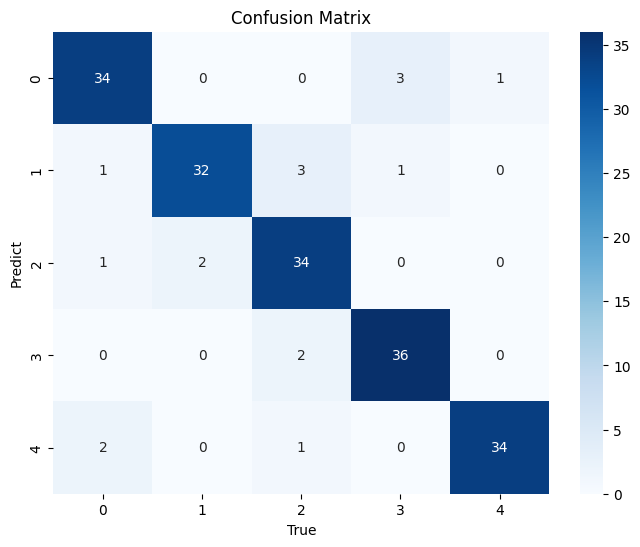

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


# **Tunning + Normalization + Oversample**

Pada pembuatan model kali ini masih menggunakan algoritma yang sama (KNN, Random Forest, dan XGBoost), namun data yang digunakan adalah data yang sudah dilakukan TunNIng Parameter, Normalisasi, dan Oversample.


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

Setiap parameter tunnning tidak selalu sama karena bergantung pada algoritma yang digunakan.

In [ ]:
knn_model = KNeighborsClassifier()
param_grid = {
    "n_neighbors": range(3, 21),
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 61),
}

knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)


In [ ]:
knn_model.fit(X_train_normal, y_train_normal)

best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan', 'leaf_size': 10, 'algorithm': 'ball_tree'}


In [ ]:
y_pred_knn = knn_model.predict(X_test_normal)

In [ ]:
# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.909
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87        38
         1.0       0.94      0.89      0.92        37
         2.0       0.84      1.00      0.91        37
         3.0       0.89      0.89      0.89        38
         4.0       0.92      0.97      0.95        37

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187



In [ ]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.909, 'recall': 0.909, 'F1 score': 0.908, 'Precision score': 0.914}


In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

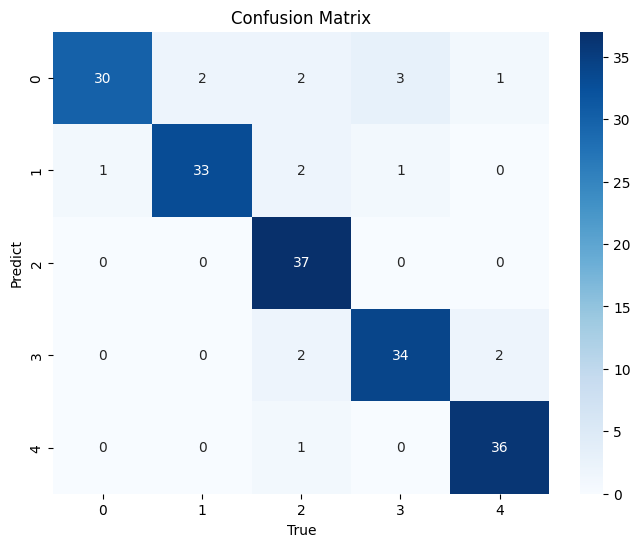

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

**Random forest**

In [ ]:
rf_model = RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [ 10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"], # "random_state": [42, 100, 200]
    }

rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

rf_model.fit(X_train_normal, y_train_normal)

best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}


In [ ]:
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))


Random Forest Model:
Accuracy: 0.888
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90        38
         1.0       0.84      0.86      0.85        37
         2.0       0.79      0.89      0.84        37
         3.0       0.92      0.92      0.92        38
         4.0       0.97      0.89      0.93        37

    accuracy                           0.89       187
   macro avg       0.89      0.89      0.89       187
weighted avg       0.89      0.89      0.89       187



In [ ]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.888, 'recall': 0.888, 'F1 score': 0.889, 'Precision score': 0.893}


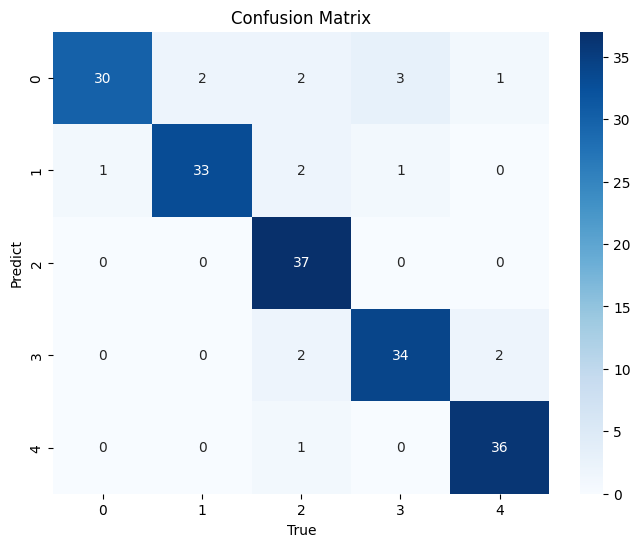

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_knn)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

**XGBOOST**

In [ ]:
xgb_model = XGBClassifier()

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8],
}

xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

xgb_model.fit(X_train_normal, y_train_normal)

best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


In [ ]:
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))


In [ ]:
evaluation(y_test_normal,y_pred_xgb)

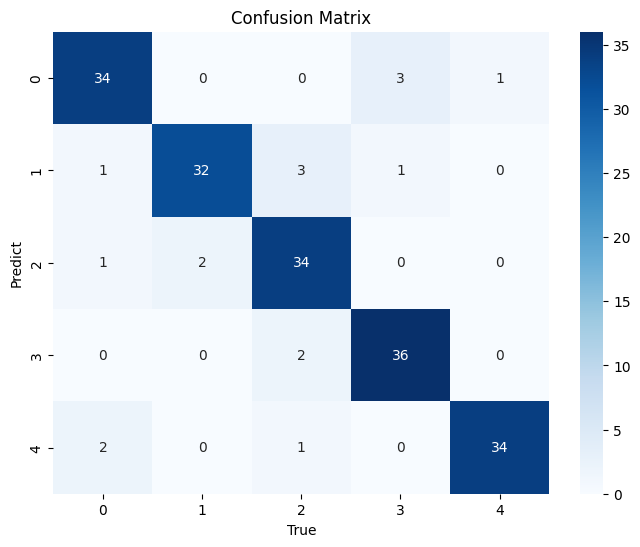

In [ ]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

# **8) Evaluasi**

Selanjutnya kita akan melakukan evaluasi data sekaligus membandingkan antar algoritma guna dengan tujuan mengetahui jenis model algoritma yang menghasilkan hasil akurasi terbaik.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                                      'XGBoost'], 'Accuracy': [accuracy_knn_smote*100,
                                      accuracy_rf_smote*100,accuracy_xgb_smote*100]})
model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,72.7
1,Random Forest,91.4
2,XGBoost,90.9


([0, 1, 2],
 [Text(0, 0, 'K-Nearest Neighbour'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'XGBoost')])

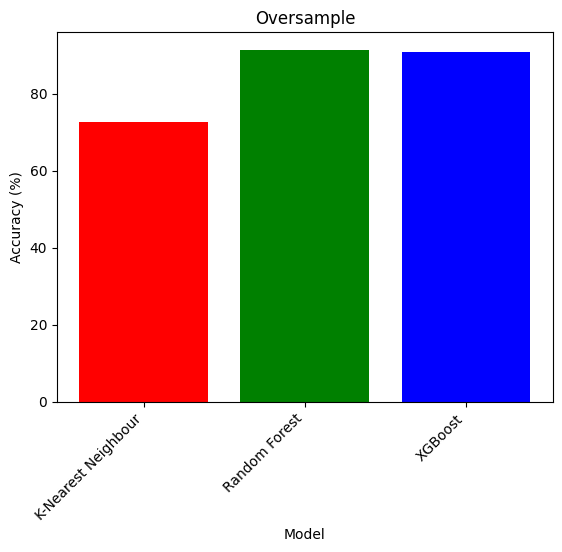

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca



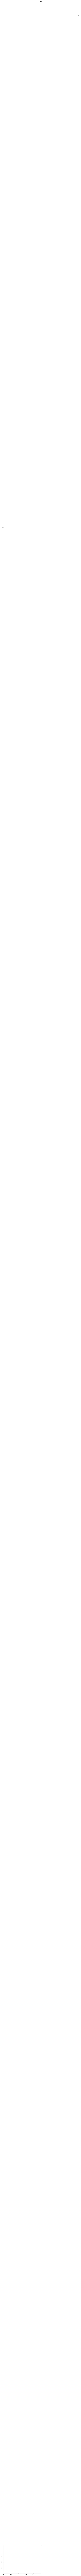

In [ ]:
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

In [ ]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                                      'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100,
                                      accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})
model_comp2.head()


,Model,Accuracy
0,K-Nearest Neighbour,82.9
1,Random Forest,92.0
2,XGBoost,90.9


([0, 1, 2],
 [Text(0, 0, 'K-Nearest Neighbour'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'XGBoost')])

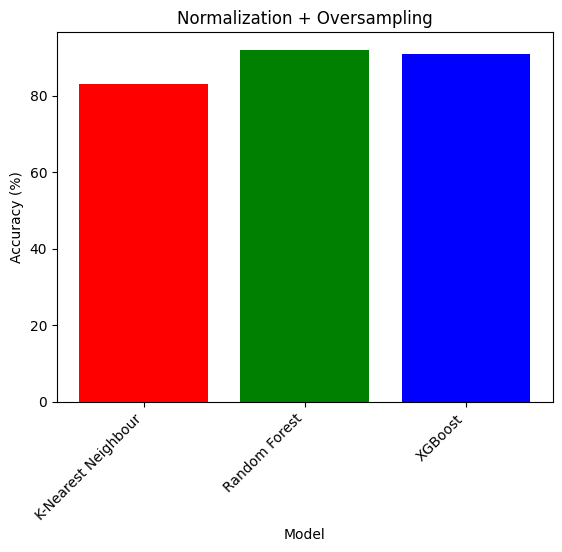

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca


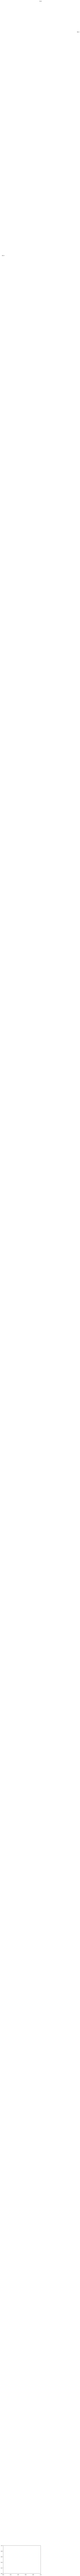

In [ ]:
# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


In [ ]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal_Tun*100,
                accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})
model_comp3.head()


,Model,Accuracy
0,K-Nearest Neighbour,90.9
1,Random Forest,88.8
2,XGBoost,89.8


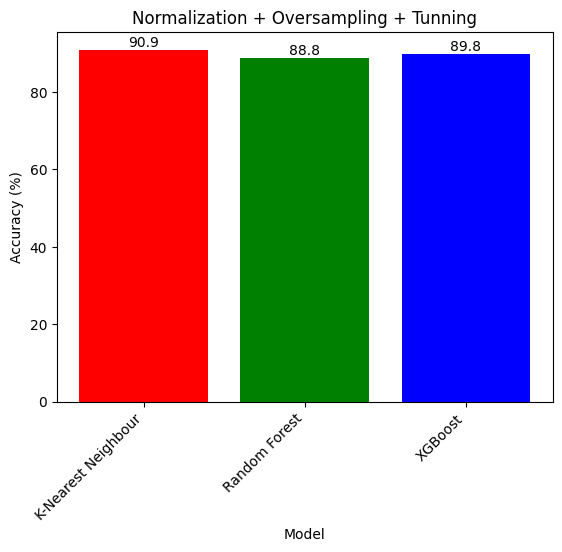

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
      yval = bar.get_height()
      plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()


In [ ]:
# Data frame
model_compBest = pd.DataFrame({
    'Model': ['K-Nearest Neighbour OverSample Tunning', 'Random Forest OverSample',
              'XGB OverSample Standarization Tunning'],
    'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal*100, accuracy_xgb_smote_normal_Tun*100]
})



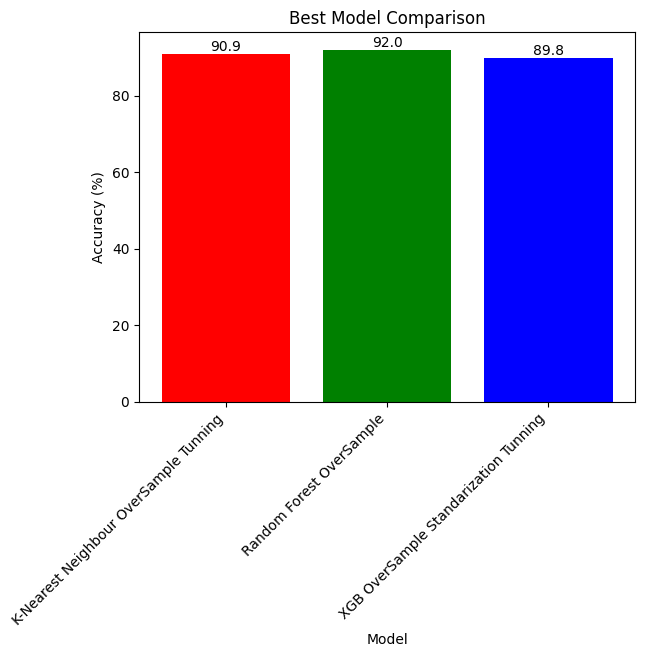

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


# **9) Streamlit**

# **10) Kesimpulan**

Dari penelitian diatas setelah melakukan pemodelan dengan algoritma KNN, Random Forest, dan XGBoost dengan berbagai penanganan data antara lain menggunakan random over sampling SMOTE untuk penanganan imbalance data, RandomSearchCV untuk tunning, dan Normalisasi data. Dapat disimpulkan bahwa klasifikasi menggunakan Random Over Sampling SMOTE pada model KNN menghasilkan akurasi 75.4 %, model Random Forest dengan akurasi yang dihasilkan yaitu 92%, dan model XGBoots menghasilkan akurasi 90.4%. Disamping itu bila klasifikasi menggunakan data yang sudah dilakukan normalisasi dan Random Over Sampling SMOTE pada model KNN menghasilkan akurasi 86.1%, model Random Forest menghasilkan akurasi 92%, dan model XGBoots menghasilkan akurasi 90.4%. Dan pada klasifikasi menggunakan data yang telah dilakukan tunning RandomSearchCV, normalisasi, dan Random Over Sampling SMOTE dalam model KNN menghasilkan akurasi 93%, pada model Random Forest menghasilkan akurasi 87.7%. dan model XGBoots menghasilkan akurasi 92%. Oleh karena itu, dalam
penanganan data yang optimal untuk mengatasi ketidakseimbangan data adalah dengan menggunakan metode random Oversampling SMOTE sekaligus yang dilengkapi dengan tuning menggunakan RandomSearchCV dan normalisasi data, memberikan hasil yang signifikan dalam meningkatkan akurasi model klasifikasi khususnya pada model KNN dan XGBoots, namun hal itu tidak terjadi pada model Random Forest yang

mengalami penurunan akurasi yang signifikan. Secara keseluruhan, penanganan dalam ketidakseimbangan data dengan menggunakan tunning parameter, normalisasi, dan oversampling dapat memberikan dampak signifikan terhadap performa model klasifikasi. Pemilihan model terbaik dan parameter optimal dapat meningkatkan akurasi dan kinerja model secara keseluruhan.
